# Analysis for Performance and Energy Consumption

## Extract information

In [63]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [64]:
# Read the CSV df into a DataFrame
df = pd.read_csv('../fibonacci_506999_2/performance_data_allVersions_fibonacci_oldVersions.csv')

# Mapping of Python versions to release dates
release_dates = {
    'Python 3.13.0a0': '2023-06-07',
    'Python 3.12.0b1': '2023-05-22',
    'Python 3.11.3': '2023-04-05',
    'Python 3.10.11': '2023-04-05',
    'Python 3.9.16': '2022-12-06',
    'Python 3.8.16': '2022-12-06',
    'Python 3.7.16': '2022-12-06',
    'Python 3.6.15': '2021-09-04',
    'Python 3.5.10': '2020-09-05',
    'Python 3.4.10': '2019-03-18',
    'Python 3.3.7': '2017-09-19',
    'Python 3.2.6': '2014-10-11',
    'Python 3.1.5': '2012-04-09',
    'Python 3.0.1': '2009-02-13',
    'Python 2.7.18': '2020-04-20',
    'Python 2.6.9': '2013-10-29',
    'Python 2.5.6': '2011-05-26',
}

# Mapping of Python versions to first releases
first_release = {
    'Python 3.13.0a0': '2023-06-07',
    'Python 3.12.0b1': '2023-05-22',
    'Python 3.11.3': '2022-10-24',
    'Python 3.10.11': '2021-10-04',
    'Python 3.9.16': '2020-10-05',
    'Python 3.8.16': '2019-10-14',
    'Python 3.7.16': '2018-06-27',
    'Python 3.6.15': '2016-12-23',
    'Python 3.5.10': '2015-09-13',
    'Python 3.4.10': '2014-03-16',
    'Python 3.3.7': '2012-09-29',
    'Python 3.2.6': '2011-02-20',
    'Python 3.1.5': '2009-06-27',
    'Python 3.0.1': '2008-12-03',
    'Python 2.7.18': '2010-07-04',
    'Python 2.6.9': '2008-10-01',
    'Python 2.5.6': '2006-09-19',
}

# Function to get release date for a given Python version
def get_release_date(version):
    return release_dates.get(version, 'Unknown')

# Function to get release date for a given Python version
def get_first_date(version):
    return first_release.get(version, 'Unknown')

# New column 'release_date' as the second 
df['release_date'] = df['python_version'].apply(get_release_date)
df.insert(1, 'release_date', df.pop('release_date'))

# New column 'first_date' as the second 
df['first_release'] = df['python_version'].apply(get_first_date)
df.insert(2, 'first_release', df.pop('first_release'))

# Convert date into datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['first_release'] = pd.to_datetime(df['first_release'])

# Remove the word 'Python '
df['python_version'] = df['python_version'].str.replace('Python ', '')
df

,python_version,release_date,first_release,appplication,time_elapsed,usec,Time_Of_Day_Seconds,APIC,X2APIC,Avg_MHz,...,Pkg%pc9,Pk%pc10,CPU%LPI,SYS%LPI,Pkg_J,Cor_J,GFX_J,RAM_J,PKG_%,RAM_%
0,2.5.6,2011-05-26,2006-09-19,fibonacci_oldVersions.py 506999,7.41879,1113.7,1.686841e+09,0.0,0.0,528.9,...,0.0,0.0,0.0,0.0,135.09,115.14,0.04,6.33,0.0,0.0
1,2.7.18,2020-04-20,2010-07-04,fibonacci_oldVersions.py 506999,4.71534,1096.1,1.686841e+09,0.0,0.0,526.1,...,0.0,0.0,0.0,0.0,85.29,72.16,0.03,4.69,0.0,0.0
2,3.0.1,2009-02-13,2008-12-03,fibonacci_oldVersions.py 506999,7.50869,1199.4,1.686841e+09,0.0,0.0,446.3,...,0.0,0.0,0.0,0.0,91.97,71.72,0.04,6.40,0.0,0.0
3,3.4.10,2019-03-18,2014-03-16,fibonacci_oldVersions.py 506999,5.55466,1191.9,1.686841e+09,0.0,0.0,445.5,...,0.0,0.0,0.0,0.0,65.83,50.70,0.03,5.23,0.0,0.0
4,3.5.10,2020-09-05,2015-09-13,fibonacci_oldVersions.py 506999,5.57666,1193.9,1.686841e+09,0.0,0.0,451.5,...,0.0,0.0,0.0,0.0,66.08,50.72,0.03,5.26,0.0,0.0
5,3.6.15,2021-09-04,2016-12-23,fibonacci_oldVersions.py 506999,5.56470,1180.7,1.686841e+09,0.0,0.0,446.7,...,0.0,0.0,0.0,0.0,65.98,50.88,0.03,5.23,0.0,0.0
6,3.7.16,2022-12-06,2018-06-27,fibonacci_oldVersions.py 506999,5.54157,1199.3,1.686841e+09,0.0,0.0,443.6,...,0.0,0.0,0.0,0.0,65.66,50.62,0.03,5.21,0.0,0.0
7,3.8.16,2022-12-06,2019-10-14,fibonacci_oldVersions.py 506999,5.51648,1199.8,1.686841e+09,0.0,0.0,445.3,...,0.0,0.0,0.0,0.0,65.38,50.33,0.03,5.19,0.0,0.0
8,3.9.16,2022-12-06,2020-10-05,fibonacci_oldVersions.py 506999,5.50998,1200.8,1.686841e+09,0.0,0.0,444.2,...,0.0,0.0,0.0,0.0,65.27,50.27,0.03,5.18,0.0,0.0
9,3.10.11,2023-04-05,2021-10-04,fibonacci_oldVersions.py 506999,5.55412,1197.9,1.686841e+09,0.0,0.0,447.2,...,0.0,0.0,0.0,0.0,65.81,50.68,0.03,5.21,0.0,0.0


In [65]:
df_data = df[['python_version', 'release_date', 'first_release', 'appplication']]
df_data

,python_version,release_date,first_release,appplication
0,2.5.6,2011-05-26,2006-09-19,fibonacci_oldVersions.py 506999
1,2.7.18,2020-04-20,2010-07-04,fibonacci_oldVersions.py 506999
2,3.0.1,2009-02-13,2008-12-03,fibonacci_oldVersions.py 506999
3,3.4.10,2019-03-18,2014-03-16,fibonacci_oldVersions.py 506999
4,3.5.10,2020-09-05,2015-09-13,fibonacci_oldVersions.py 506999
5,3.6.15,2021-09-04,2016-12-23,fibonacci_oldVersions.py 506999
6,3.7.16,2022-12-06,2018-06-27,fibonacci_oldVersions.py 506999
7,3.8.16,2022-12-06,2019-10-14,fibonacci_oldVersions.py 506999
8,3.9.16,2022-12-06,2020-10-05,fibonacci_oldVersions.py 506999
9,3.10.11,2023-04-05,2021-10-04,fibonacci_oldVersions.py 506999


In [66]:
df_metric = df.loc[:, ~df.columns.isin(['python_version', 'release_date', 'first_release', 'appplication'])]
df_metric

,time_elapsed,usec,Time_Of_Day_Seconds,APIC,X2APIC,Avg_MHz,Busy%,Bzy_MHz,TSC_MHz,IPC,...,Pkg%pc9,Pk%pc10,CPU%LPI,SYS%LPI,Pkg_J,Cor_J,GFX_J,RAM_J,PKG_%,RAM_%
0,7.41879,1113.7,1.686841e+09,0.0,0.0,528.9,12.99,4070.2,1896.0,2.91,...,0.0,0.0,0.0,0.0,135.09,115.14,0.04,6.33,0.0,0.0
1,4.71534,1096.1,1.686841e+09,0.0,0.0,526.1,13.14,4003.5,1896.0,2.20,...,0.0,0.0,0.0,0.0,85.29,72.16,0.03,4.69,0.0,0.0
2,7.50869,1199.4,1.686841e+09,0.0,0.0,446.3,13.12,3401.6,1896.0,2.76,...,0.0,0.0,0.0,0.0,91.97,71.72,0.04,6.40,0.0,0.0
3,5.55466,1191.9,1.686841e+09,0.0,0.0,445.5,13.29,3354.4,1896.0,2.22,...,0.0,0.0,0.0,0.0,65.83,50.70,0.03,5.23,0.0,0.0
4,5.57666,1193.9,1.686841e+09,0.0,0.0,451.5,13.52,3347.5,1896.0,2.22,...,0.0,0.0,0.0,0.0,66.08,50.72,0.03,5.26,0.0,0.0
5,5.56470,1180.7,1.686841e+09,0.0,0.0,446.7,13.23,3377.1,1896.0,2.21,...,0.0,0.0,0.0,0.0,65.98,50.88,0.03,5.23,0.0,0.0
6,5.54157,1199.3,1.686841e+09,0.0,0.0,443.6,13.20,3359.6,1896.0,2.23,...,0.0,0.0,0.0,0.0,65.66,50.62,0.03,5.21,0.0,0.0
7,5.51648,1199.8,1.686841e+09,0.0,0.0,445.3,13.18,3376.7,1896.0,2.24,...,0.0,0.0,0.0,0.0,65.38,50.33,0.03,5.19,0.0,0.0
8,5.50998,1200.8,1.686841e+09,0.0,0.0,444.2,13.15,3378.7,1896.0,2.24,...,0.0,0.0,0.0,0.0,65.27,50.27,0.03,5.18,0.0,0.0
9,5.55412,1197.9,1.686841e+09,0.0,0.0,447.2,13.27,3371.3,1896.0,2.21,...,0.0,0.0,0.0,0.0,65.81,50.68,0.03,5.21,0.0,0.0


In [67]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(df_metric)
scaled = transformer.transform(df_metric)


test_1 = pd.DataFrame(scaled, columns=df_metric.columns)
test_1

,time_elapsed,usec,Time_Of_Day_Seconds,APIC,X2APIC,Avg_MHz,Busy%,Bzy_MHz,TSC_MHz,IPC,...,Pkg%pc9,Pk%pc10,CPU%LPI,SYS%LPI,Pkg_J,Cor_J,GFX_J,RAM_J,PKG_%,RAM_%
0,0.988027,0.926770,1.0,0.0,0.0,1.000000,0.960799,1.000000,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.00,0.989062,0.0,0.0
1,0.627984,0.912124,1.0,0.0,0.0,0.994706,0.971893,0.983613,1.0,0.756014,...,0.0,0.0,0.0,0.0,0.631357,0.626715,0.75,0.732812,0.0,0.0
2,1.000000,0.998086,1.0,0.0,0.0,0.843827,0.970414,0.835733,1.0,0.948454,...,0.0,0.0,0.0,0.0,0.680805,0.622894,1.00,1.000000,0.0,0.0
3,0.739764,0.991845,1.0,0.0,0.0,0.842314,0.982988,0.824136,1.0,0.762887,...,0.0,0.0,0.0,0.0,0.487305,0.440334,0.75,0.817188,0.0,0.0
4,0.742694,0.993509,1.0,0.0,0.0,0.853659,1.000000,0.822441,1.0,0.762887,...,0.0,0.0,0.0,0.0,0.489155,0.440507,0.75,0.821875,0.0,0.0
5,0.741101,0.982525,1.0,0.0,0.0,0.844583,0.978550,0.829714,1.0,0.759450,...,0.0,0.0,0.0,0.0,0.488415,0.441897,0.75,0.817188,0.0,0.0
6,0.738021,0.998003,1.0,0.0,0.0,0.838722,0.976331,0.825414,1.0,0.766323,...,0.0,0.0,0.0,0.0,0.486046,0.439639,0.75,0.814062,0.0,0.0
7,0.734679,0.998419,1.0,0.0,0.0,0.841936,0.974852,0.829615,1.0,0.769759,...,0.0,0.0,0.0,0.0,0.483974,0.437120,0.75,0.810937,0.0,0.0
8,0.733814,0.999251,1.0,0.0,0.0,0.839856,0.972633,0.830107,1.0,0.769759,...,0.0,0.0,0.0,0.0,0.483159,0.436599,0.75,0.809375,0.0,0.0
9,0.739692,0.996838,1.0,0.0,0.0,0.845528,0.981509,0.828289,1.0,0.759450,...,0.0,0.0,0.0,0.0,0.487157,0.440160,0.75,0.814062,0.0,0.0


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_metric)

# get max values in each column
max = scaler.data_max_

test_2 = pd.DataFrame(scaler.transform(df_metric), columns=df_metric.columns)
test_2

,time_elapsed,usec,Time_Of_Day_Seconds,APIC,X2APIC,Avg_MHz,Busy%,Bzy_MHz,TSC_MHz,IPC,...,Pkg%pc9,Pk%pc10,CPU%LPI,SYS%LPI,Pkg_J,Cor_J,GFX_J,RAM_J,PKG_%,RAM_%
0,0.967816,0.166667,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,0.959064,0.0,0.0
1,0.000000,0.000000,0.069924,0.0,0.0,0.967366,0.283019,0.907707,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.292614,0.342512,0.0,0.000000,0.0,0.0
2,1.000000,0.978220,0.180988,0.0,0.0,0.037296,0.245283,0.074858,0.0,0.788732,...,0.0,0.0,0.0,0.0,0.387500,0.335781,1.0,1.000000,0.0,0.0
3,0.300471,0.907197,0.263331,0.0,0.0,0.027972,0.566038,0.009548,0.0,0.028169,...,0.0,0.0,0.0,0.0,0.016193,0.014227,0.0,0.315789,0.0,0.0
4,0.308347,0.926136,0.345993,0.0,0.0,0.097902,1.000000,0.000000,0.0,0.028169,...,0.0,0.0,0.0,0.0,0.019744,0.014533,0.0,0.333333,0.0,0.0
5,0.304065,0.801136,0.428481,0.0,0.0,0.041958,0.452830,0.040958,0.0,0.014085,...,0.0,0.0,0.0,0.0,0.018324,0.016980,0.0,0.315789,0.0,0.0
6,0.295785,0.977273,0.510630,0.0,0.0,0.005828,0.396226,0.016743,0.0,0.042254,...,0.0,0.0,0.0,0.0,0.013778,0.013003,0.0,0.304094,0.0,0.0
7,0.286803,0.982008,0.592407,0.0,0.0,0.025641,0.358491,0.040404,0.0,0.056338,...,0.0,0.0,0.0,0.0,0.009801,0.008567,0.0,0.292398,0.0,0.0
8,0.284476,0.991477,0.674090,0.0,0.0,0.012821,0.301887,0.043171,0.0,0.056338,...,0.0,0.0,0.0,0.0,0.008239,0.007649,0.0,0.286550,0.0,0.0
9,0.300277,0.964015,0.756415,0.0,0.0,0.047786,0.528302,0.032932,0.0,0.014085,...,0.0,0.0,0.0,0.0,0.015909,0.013921,0.0,0.304094,0.0,0.0


In [69]:
df = pd.concat([df_data,test_2.reindex(df_data.index)], axis=1)

In [70]:
# Extract relevant columns
python_version = df['python_version']
release = df['release_date']
first_release = df['first_release']
time_elapsed = df['time_elapsed']
avg_mhz = df['Avg_MHz']                       # no. of cycles executed divided by time elapsed
busy_percent = df['Busy%']                    # % of time in C0 state
busy_mhz = df['Bzy_MHz']                      # Avg clock rate while the CPU was not idle in C0 state
ipc = df['IPC']
irq = df['IRQ']
poll = df['POLL']
c1 = df['C1']
c1e = df['C1E']
c3 = df['C3']
c6 = df['C6']
c7s = df['C7s']
c8 = df['C8']
coreTemperature = df['CoreTmp']
pkgTemperature = df['PkgTmp']
gfx_percent = df['GFX%rc6']
gfx_mhz = df['GFXMHz']
total_c0_percent = df['Totl%C0']
any_c0_percent = df['Any%C0']
gfx_c0_percent = df['GFX%C0']
cpugfx_percent = df['CPUGFX%']
energy_pkg = df['Pkg_J']
energy_core = df['Cor_J']
energy_gfx = df['GFX_J']
energy_ram = df['RAM_J']



## Trend Plots

### Time elapsed vs CPU usage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


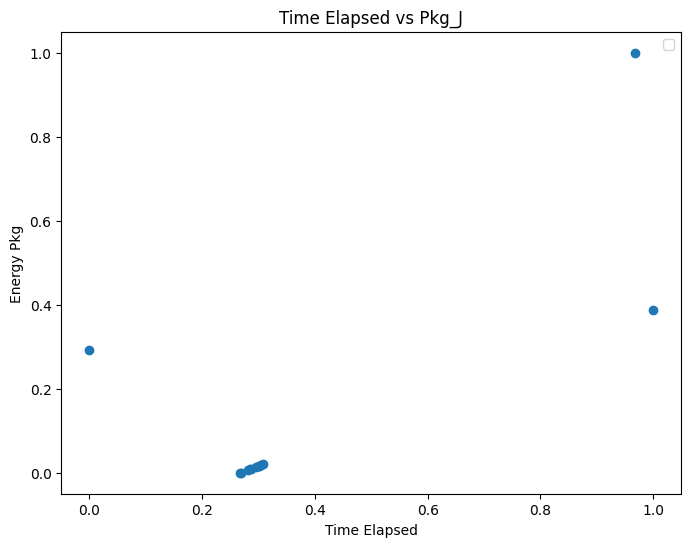

In [71]:
# Plot time elapsed vs CPU usage
plt.figure(figsize=(8, 6))
plt.scatter(time_elapsed, energy_pkg)
plt.xlabel('Time Elapsed')
plt.ylabel('Energy Pkg')
plt.title('Time Elapsed vs Pkg_J')
plt.legend()
plt.show()

### Time elapsed vs Avg MHz

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


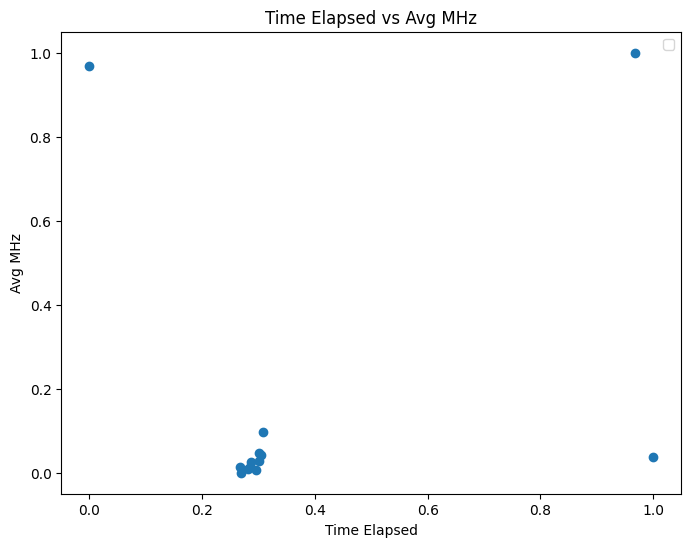

In [72]:

# Plot time elapsed vs Memory usage
plt.figure(figsize=(8, 6))
plt.scatter(time_elapsed, avg_mhz)
plt.xlabel('Time Elapsed')
plt.ylabel('Avg MHz')
plt.title('Time Elapsed vs Avg MHz')
plt.legend()
plt.show()

### Energy Consumption through different Python versions

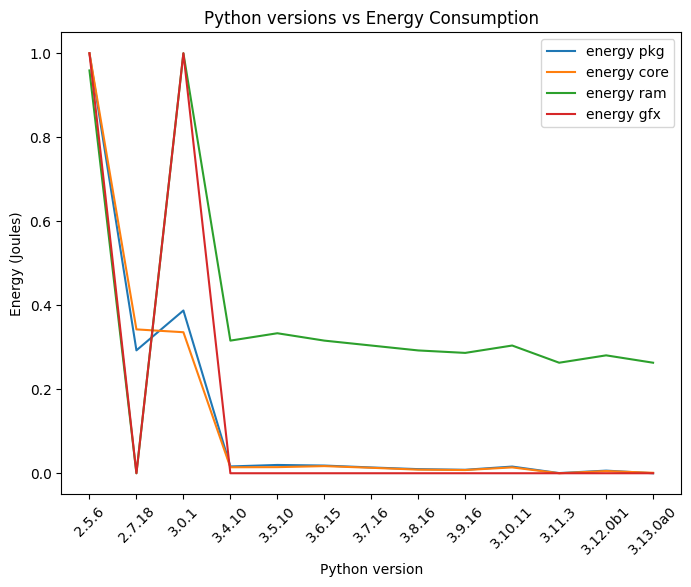

In [73]:

# Plot Python version vs Energy Consumption
plt.figure(figsize=(8,6))
plt.plot(python_version, energy_pkg, label='energy pkg')
plt.plot(python_version, energy_core, label='energy core')
plt.plot(python_version, energy_ram, label='energy ram')
plt.plot(python_version, energy_gfx, label='energy gfx')
plt.xlabel('Python version')
plt.ylabel('Energy (Joules)')
plt.xticks(rotation=45)
plt.title('Python versions vs Energy Consumption')
plt.legend()
plt.show()

In [74]:
fig = px.line(df, x="python_version", y=["Pkg_J","Cor_J","GFX_J","RAM_J"], text=pd.to_datetime(df['first_release']).dt.year)
fig.update_traces(textposition="bottom right")
fig.show()

### Energy Consumption through releases (based on Python version)

In [75]:
fig = px.line(df, x="first_release", y=["Pkg_J","Cor_J","GFX_J","RAM_J"], text="python_version")
fig.update_traces(textposition="bottom right")
fig.show()

### Time elapsed and more parameters through different Python versions

In [76]:
fig = px.line(df, x="python_version", y=["time_elapsed","Avg_MHz","Busy%","Bzy_MHz","IPC","IRQ","POLL"], text=pd.to_datetime(df['release_date']).dt.year)
fig.update_traces(textposition="bottom right")
fig.show()
plotly.offline.plot(fig, filename='test1.html')

'test1.html'

### More parameters through different Python versions

In [77]:
fig = px.line(df, x="python_version", y=["C1","C1E","C3","C6","C7s","C8"], text=pd.to_datetime(df['release_date']).dt.year)
fig.update_traces(textposition="bottom right")
fig.show()

### Temperature through different Python versions

In [78]:
fig = px.line(df, x="python_version", y=["CoreTmp","PkgTmp"], text=pd.to_datetime(df['release_date']).dt.year)
fig.update_traces(textposition="bottom right")
fig.show()

### More parameters through different Python versions

In [79]:
fig = px.line(df, x="python_version", y=["GFX%rc6","GFXMHz","Totl%C0","Any%C0","GFX%C0","CPUGFX%"], text=pd.to_datetime(df['release_date']).dt.year)
fig.update_traces(textposition="bottom right")
fig.show()

## Correlations

### Energy

In [80]:
energy = pd.concat([python_version,time_elapsed,energy_core,energy_pkg,energy_gfx,energy_ram], axis=1)

### CPU

In [81]:
cpu = pd.concat([time_elapsed,avg_mhz,busy_mhz,busy_percent,ipc,irq,poll,c1,c1e,c3,c6,c7s,c8,coreTemperature,pkgTemperature,total_c0_percent,any_c0_percent,cpugfx_percent,gfx_c0_percent,gfx_percent,gfx_mhz], axis=1)

## Notes

In [82]:
# Normalize the data
# Observe the correlation between the values
# Select which parameters
# Find information regarding the memory consumption/usage
# Select algorithms/application


# MEMORY DATA
# READ ABOUT THE CHANGES IN THE LAST PYTHON VERSIONS - FINDING THE REASON!!!!!
# MEANING OF EACH MEASUREMENT
